# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

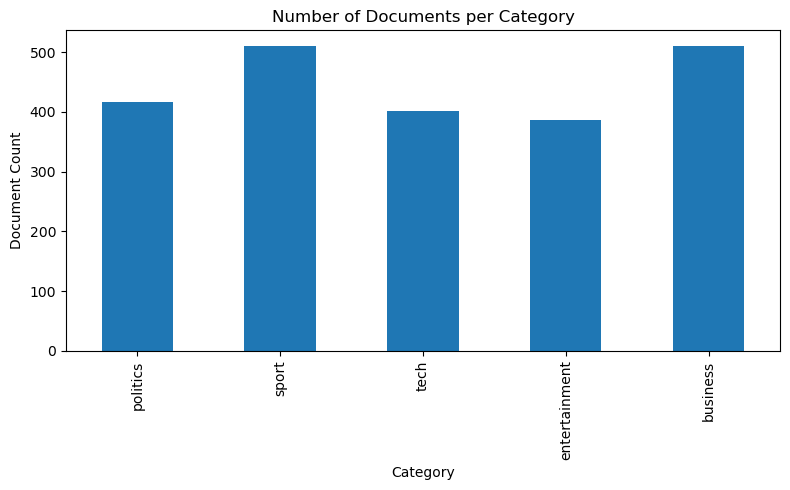

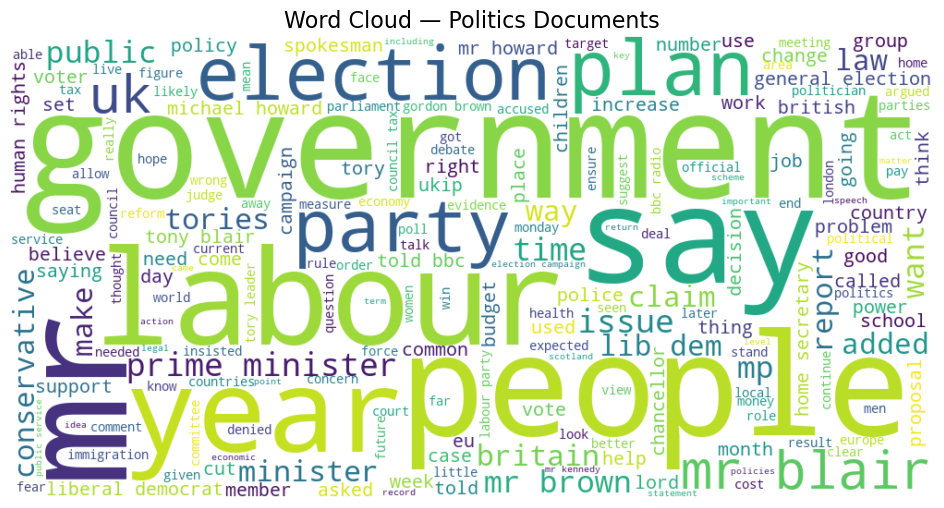

Top terms for politics: [('mr', 1686), ('government', 644), ('labour', 616), ('people', 593), ('election', 565), ('blair', 509), ('party', 480), ('minister', 393), ('told', 359), ('brown', 327)]


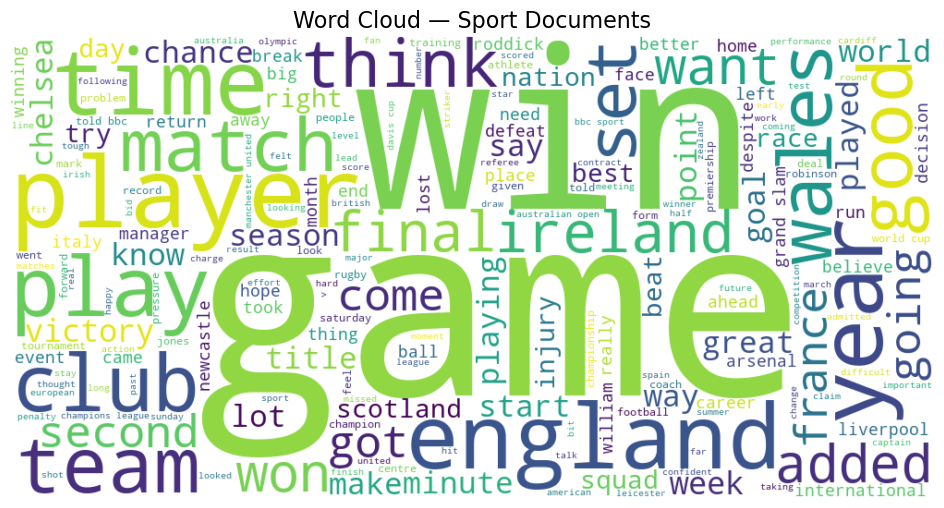

Top terms for sport: [('game', 473), ('win', 415), ('england', 394), ('world', 374), ('time', 327), ('players', 307), ('play', 292), ('cup', 290), ('just', 285), ('wales', 265)]


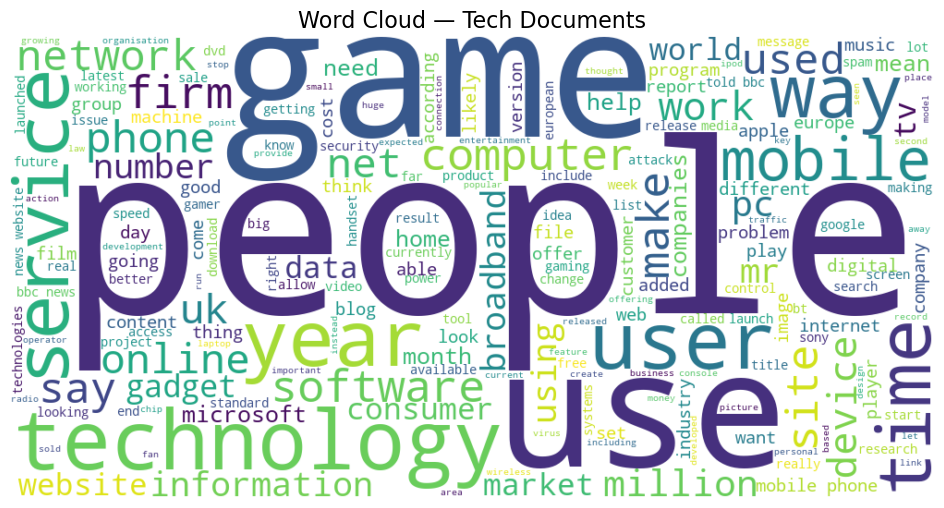

Top terms for tech: [('people', 940), ('mr', 509), ('technology', 504), ('mobile', 466), ('users', 407), ('games', 400), ('music', 384), ('use', 379), ('digital', 373), ('software', 371)]


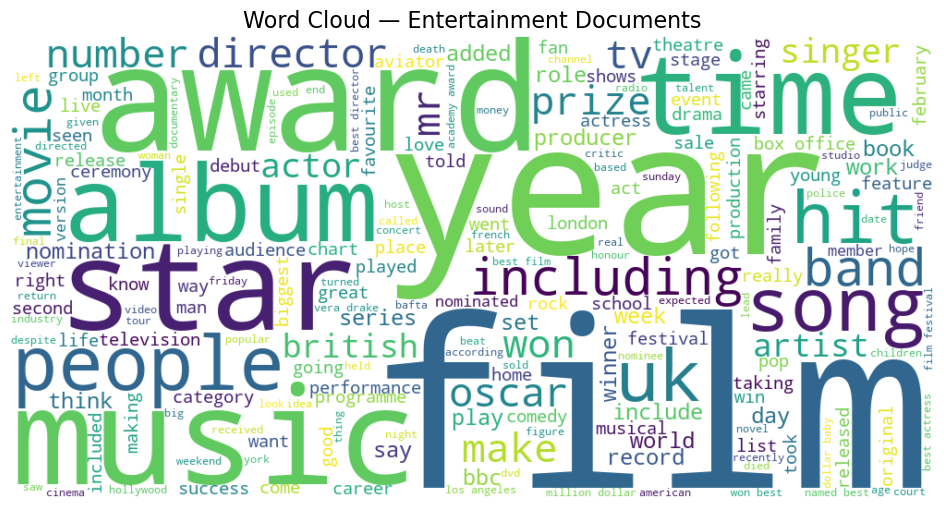

Top terms for entertainment: [('film', 732), ('best', 590), ('music', 430), ('awards', 273), ('year', 259), ('award', 233), ('number', 227), ('years', 226), ('won', 225), ('uk', 211)]


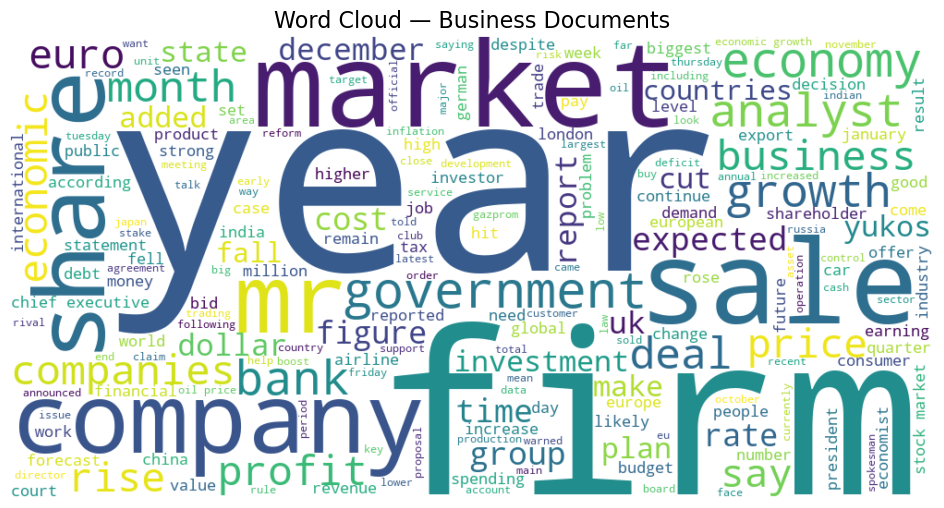

Top terms for business: [('year', 610), ('mr', 600), ('market', 420), ('growth', 384), ('company', 366), ('economy', 352), ('firm', 321), ('sales', 316), ('bank', 316), ('economic', 310)]


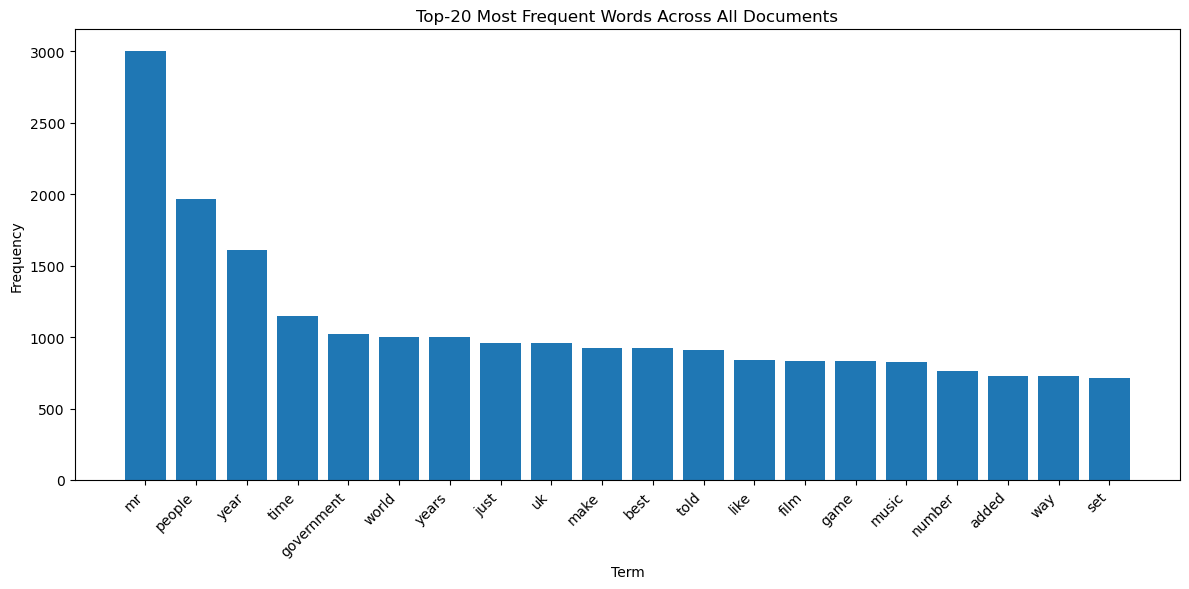

Top overall terms: [('mr', 3004), ('people', 1969), ('year', 1607), ('time', 1147), ('government', 1023), ('world', 1003), ('years', 1001), ('just', 957), ('uk', 956), ('make', 927), ('best', 926), ('told', 911), ('like', 838), ('film', 834), ('game', 831), ('music', 828), ('number', 760), ('added', 731), ('way', 726), ('set', 714)]


In [ ]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

data_path = Path("df_file.csv")
df = pd.read_csv(data_path)

if "Text" in df.columns and "Label" in df.columns:
    df = df.rename(columns={"Text": "Document", "Label": "Category"})
elif "Document" not in df.columns or "Category" not in df.columns:
    raise ValueError("Expected columns 'Text'/'Label' or 'Document'/'Category'.")


label_to_name = {
    0: "politics",
    1: "sport",
    2: "tech",
    3: "entertainment",
    4: "business",
}
if pd.api.types.is_integer_dtype(df["Category"]) or pd.api.types.is_float_dtype(df["Category"]):
    df["Category"] = df["Category"].map(label_to_name)


df = df.dropna(subset=["Category"])
df["Category"] = df["Category"].astype(str)

categories = ["politics","sport","tech","entertainment","business"]

additional_stopwords = {"said","will","one","two","new","also","can","us","many"}
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
import string

def clean_tokens(text: str):
    if not isinstance(text, str):
        return []
    words = text.lower().split()
    out = []
    for w in words:
        w = w.strip(string.punctuation)
        if w.isalnum() and w not in sklearn_stop_words and w not in additional_stopwords:
            out.append(w)
    return out

def tokens_from_subset(sub_df):
    all_text = " ".join(sub_df["Document"].astype(str).tolist())
    return clean_tokens(all_text)

# --- Viz 1: Category counts (robust to missing categories) ---
counts = df["Category"].value_counts()
counts = counts.reindex(categories).fillna(0).astype(int)
plt.figure(figsize=(8,5))
counts.plot(kind="bar")
plt.title("Number of Documents per Category")
plt.xlabel("Category")
plt.ylabel("Document Count")
plt.tight_layout()
plt.show()

# --- Viz 2–6: Word clouds per category ---
for cat in categories:
    subset = df[df["Category"] == cat]
    words = tokens_from_subset(subset)
    if not words:
        print(f"Top terms for {cat}: []")
        continue
    wc = WordCloud(width=1000, height=500, background_color="white").generate(" ".join(words))
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(f"Word Cloud — {cat.title()} Documents", fontsize=16)
    plt.axis("off")
    plt.show()
    top_words = Counter(words).most_common(10)
    print(f"Top terms for {cat}: {top_words}")

# --- Viz 7: Overall top-20 terms ---
overall_tokens = tokens_from_subset(df)
top20 = Counter(overall_tokens).most_common(20)
if top20:
    terms, vals = zip(*top20)
    plt.figure(figsize=(12,6))
    plt.bar(terms, vals)
    plt.xticks(rotation=45, ha="right")
    plt.title("Top-20 Most Frequent Words Across All Documents")
    plt.xlabel("Term")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    print(f"Top overall terms: {top20}")
else:
    print("Top overall terms: []")